Simulons $v(t, x) = \int \left[\hat h(\xi) \exp\left(-4\pi^2\alpha (T - t)|\xi|^2\right) \right]\exp\left(\textrm{i}2\pi x\cdot\xi\right)\textrm{d}\xi$, solution de l'EDP $\partial_{t}v + \alpha \partial_{xx} v = 0$ avec condition au bord $v_{T} = h$.

In [123]:
import matplotlib.pyplot as plt
import numpy as np

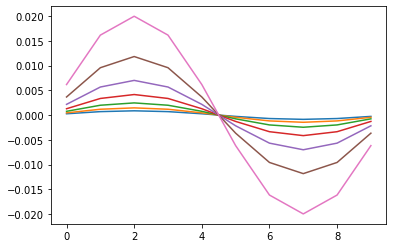

In [305]:
t = np.linspace(0, T / 2, 7)
x = np.linspace(0, 2 * np.pi, 10)
h = np.sin(x)  # array N^d -> R
alpha = 1 / 2
T = 1


def v(t):
    hHat = np.fft.fftn(h)
    xi2 = np.sum(np.indices(h.shape) ** 2, axis=0)
    k = np.exp(-4 * np.pi * alpha * (T - t).reshape(-1, 1) @ xi2.reshape(1, -1))
    f = hHat * k
    return np.fft.ifftn(f, s=h.shape)

v_tx = np.real(v(t))
plt.plot(v_tx.T)
plt.show()